# **LAB 07- LOGISTICS REGRESSION**

Logistic regression predicts probabilities using the sigmoid function:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)= 
1+e 
−z
 
1
​
 
where z is calculated as:

𝑧
=
𝑤
𝑋
+
𝑏
z=wX+b
Here,

X = input feature (age)
w = weight (model parameter)
b = bias (model parameter)
If the probability ≥ 0.5, the output is 1 (buys insurance); otherwise, it is 0 (does not buy).

### **IMPORT LIBRARIES**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix  


##  **Load and Visualize the Dataset**

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


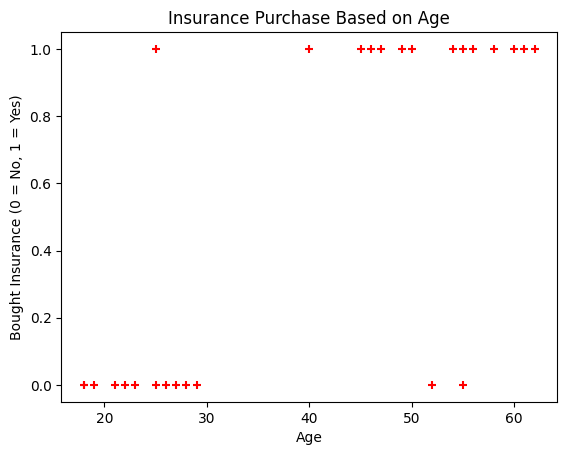

In [2]:
df = pd.read_csv("insurance_data.csv")  
print(df.head())  # View first few rows  

# Plot age vs. bought insurance  
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')  
plt.xlabel("Age")  
plt.ylabel("Bought Insurance (0 = No, 1 = Yes)")  
plt.title("Insurance Purchase Based on Age")  
plt.show()  


## **Split Data into Training and Testing Sets**

In [3]:
X = df[['age']]  # Features  
y = df.bought_insurance  # Target variable  

# 80% training, 20% testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)  

print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")  


Training set size: 21, Testing set size: 6


## **Train the Logistic Regression Model**

In [4]:
model = LogisticRegression()  # Create model  
model.fit(X_train, y_train)  # Train model  

print("Model trained successfully!")  


Model trained successfully!


## **Make Predictions on Test Data**

In [5]:
y_pred = model.predict(X_test)  # Predict test labels  
print("Predictions:", y_pred)  


Predictions: [1 0 1 0 0 0]


## **Predict Probability of Buying Insurance**

In [6]:
probabilities = model.predict_proba(X_test)  
print("Prediction Probabilities:\n", probabilities)  


Prediction Probabilities:
 [[0.05428681 0.94571319]
 [0.70555426 0.29444574]
 [0.06039343 0.93960657]
 [0.77085061 0.22914939]
 [0.84096546 0.15903454]
 [0.72848825 0.27151175]]


## **Evaluate Model Using a Confusion Matrix**

In [7]:
cm = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:\n", cm)  


Confusion Matrix:
 [[4 0]
 [0 2]]


## **Modify Training Data Split Ratio (Optional Experiment)**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)  


## **Visualize the Sigmoid Function**

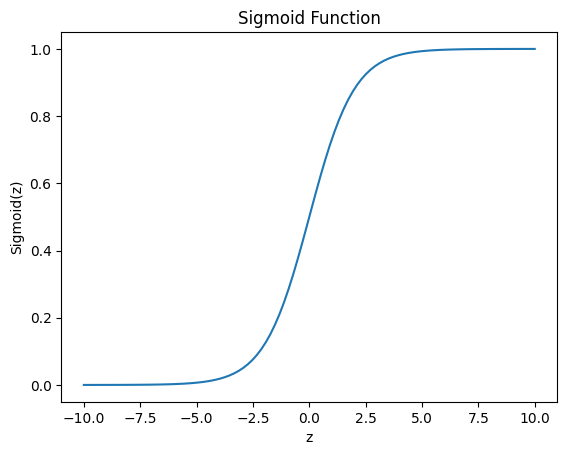

In [9]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))  

z = np.linspace(-10, 10, 100)  
plt.plot(z, sigmoid(z))  
plt.xlabel("z")  
plt.ylabel("Sigmoid(z)")  
plt.title("Sigmoid Function")  
plt.show()  


## **Test Model on New Data**

In [10]:
new_data = [[40]]  # Example: Age 40  
prediction = model.predict(new_data)  
print("Prediction for Age 40:", prediction)  


Prediction for Age 40: [1]


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **LAB TASK 01**

**Predict Probability of Buying Insurance – Use model.predict_proba(X_test) to get the probability estimates for each test instance instead of just the class labels**

In [11]:
probabilities = model.predict_proba(X_test)
print(probabilities)


[[0.05428681 0.94571319]
 [0.70555426 0.29444574]
 [0.06039343 0.93960657]
 [0.77085061 0.22914939]
 [0.84096546 0.15903454]
 [0.72848825 0.27151175]
 [0.79021099 0.20978901]
 [0.08276569 0.91723431]
 [0.75026822 0.24973178]]


**Explanation:**
This function returns the probability that a person will (or won't) buy insurance. The first column gives the probability of not buying (0), and the second column gives the probability of buying (1).

# **LAB TASK 02**

**Modify Training Data Split Ratio – Change the train-test split ratio from 80-20 to 70-30 or 60-40 and observe how it affects model performance**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.7)


**Explanation:**
A larger test set (30% or 40%) means the model is tested on more data, affecting performance. Try different splits to see how accuracy changes.

# **LAB TASK 03**

**Evaluate Model Performance Using a Confusion Matrix – Use sklearn.metrics.confusion_matrix to generate and analyze the confusion matrix for the test predictions.**

In [13]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)


[[2 2]
 [1 4]]


**Explanation:**
The confusion matrix helps understand misclassifications by showing how many predictions were correct or incorrect.

# **LAB TASK 04**

**Visualize the Sigmoid Function – Plot the sigmoid function over a range of values using Matplotlib to see how it maps inputs to probabilities**

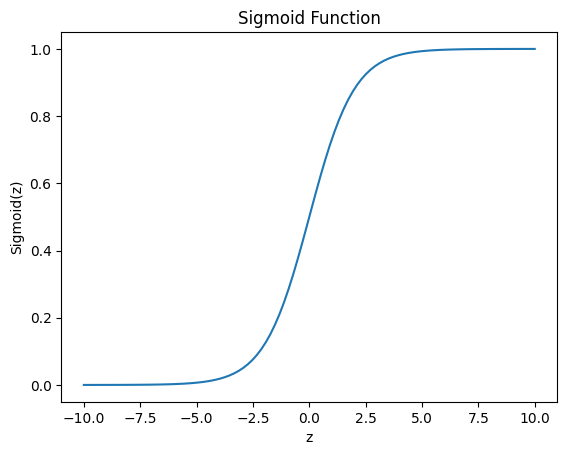

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.show()


**Explanation:**
The sigmoid function maps values between 0 and 1, making it useful for probability-based classification.

# **LAB TASK 05**

**Test Model on New Data – Manually input a new age value, pass it through the trained model using .predict(), and determine whether the person is likely to buy insurance**

In [15]:
new_data = [[40]]  # Example: Person of age 40
prediction = model.predict(new_data)
print("Prediction:", prediction)


Prediction: [1]


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Explanation:**
If the output is 1, the model predicts that the person will buy insurance; otherwise, it predicts 0 (won't buy).